In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel

In [2]:
rng = np.random.RandomState(0)

# Generate sample data
X = 15 * rng.rand(100, 1)
y = np.sin(X).ravel()
y += 0.5*rng.normal(size=X.shape[0])  # add noise
X_plot = np.linspace(0, 15, 10000)[:, None]

# Fix KernelRidge parameters for exact output
kr = KernelRidge(alpha=0.2500000001, kernel=ExpSineSquared(2.0446919886424295, 2*np.pi, length_scale_bounds='fixed', periodicity_bounds='fixed'))

stime = time.time()
kr.fit(X, y)
# Predict using kernel ridge
y_kr = kr.predict(X_plot)

gp_kernel = ExpSineSquared(1.0, 2*np.pi, periodicity_bounds='fixed')  + WhiteKernel(0.25, noise_level_bounds='fixed')
gpr = GaussianProcessRegressor(kernel=gp_kernel)
stime = time.time()
gpr.fit(X, y)
# Predict using gaussian process regressor
y_gpr, y_std = gpr.predict(X_plot, return_std=True)

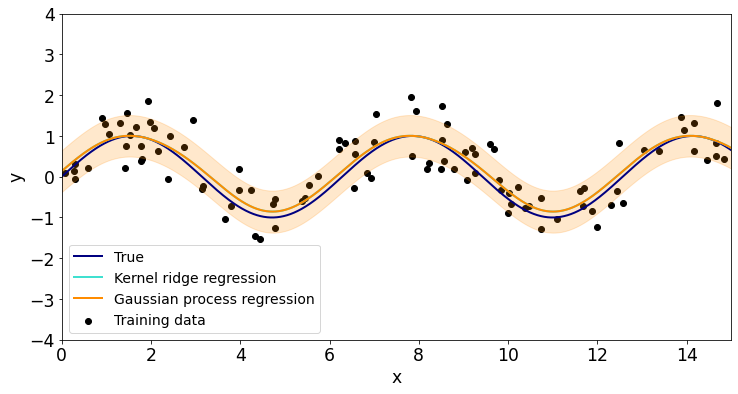

In [3]:
# Plot results
plt.figure(figsize=(12, 6))
lw = 2
plt.scatter(X, y, c='k', label='Training data')
plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')
plt.plot(X_plot, y_kr, color='turquoise', lw=lw, label='Kernel ridge regression')
#         label='KRR (%s)' % kr.best_params_)
plt.plot(X_plot, y_gpr, color='darkorange', lw=lw, 
         label='Gaussian process regression')
plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
                 alpha=0.2)
plt.xlabel('x',size='xx-large')
plt.ylabel('y',size='xx-large')
plt.xlim(0, 15)
plt.ylim(-4, 4)
#plt.title('GPR versus Kernel Ridge')
plt.tick_params(labelsize='xx-large')

plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.show()

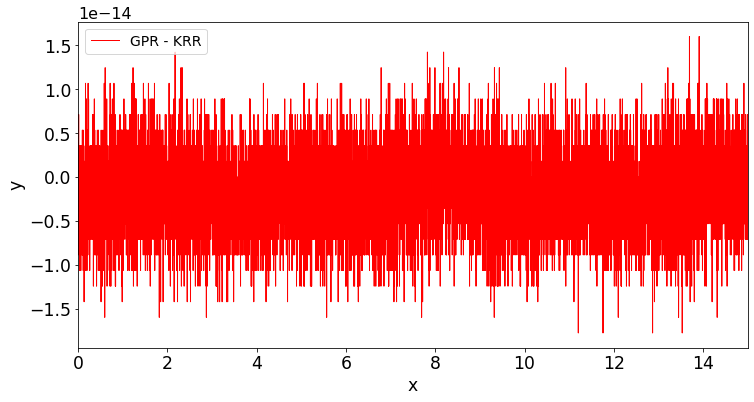

In [4]:
# Plot results
fig, a0 = plt.subplots(1, 1, figsize=(12, 6))
lw = 2
#a0.plot(X_plot, y_gpr-y_gpr2, color='darkorange', lw=lw,
#         label='GPR diff')
a0.plot(X_plot, y_gpr-y_kr, color='red', lw=1,
         label='GPR - KRR')
a0.set_xlabel('x',size='xx-large')
a0.set_ylabel('y',size='xx-large')
a0.set_xlim(0, 15)
#a0.ylim(-4, 4)
#a0.title('GPR versus Kernel Ridge')
a0.tick_params(labelsize='xx-large')
tx = a0.yaxis.get_offset_text()
tx.set_fontsize(16)
a0.legend(loc="best",  scatterpoints=1, prop={'size': 14})
